In [34]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

In [88]:
adjacency_matrix = np.array([[-1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 
                             [0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 
                             [0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0], 
                             [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0], 
                             [0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0], 
                             [0, 0, 0, 0, 0, -1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0], 
                             [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0], 
                             [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0], 
                             [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0], 
                             [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0], 
                             [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 1, 0, 0, 1, 0], 
                             [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1], 
                             [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0], 
                             [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0], 
                             [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
                             [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1]])
print(adjacency_matrix)

[[-1  1  0  0  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  0  0  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  0  0  1  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  0  1  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 -1  1  0  0  1  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  1  0  0  1  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  1  0  0  1  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  1  0  0  1  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 -1  1  0  0  1  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1]]


In [89]:
G = nx.Graph(adjacency_matrix, nodetype=int)
G.edges()

EdgeView([(0, 0), (0, 1), (0, 4), (1, 2), (1, 5), (2, 3), (2, 6), (3, 7), (4, 5), (4, 8), (5, 5), (5, 6), (5, 9), (6, 7), (6, 10), (7, 11), (8, 9), (8, 12), (9, 10), (9, 13), (10, 10), (10, 11), (10, 14), (11, 15), (12, 13), (13, 14), (14, 15), (15, 15)])

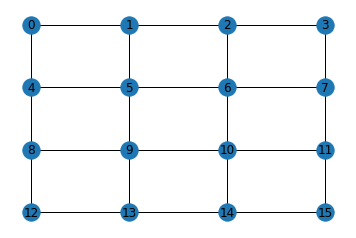

In [90]:
plt.axis('off')
#pos = nx.random_layout(G)
pos = np.array([[-1, 0.5], [-0.5, 0.5], [0, 0.5], [0.5,0.5], 
                [-1, 0], [-0.5, 0], [0, 0], [0.5,0],
                [-1, -0.5],[-0.5, -0.5],[0, -0.5], [0.5,-0.5],
                [-1, -1],[-0.5, -1],[0, -1], [0.5,-1]])
#print(pos)
nx.draw_networkx(G,pos)
plt.show()

In [91]:
from dwave.system import DWaveSampler, EmbeddingComposite, DWaveCliqueSampler
import dimod
import dwave.inspector

bqm = dimod.from_networkx_graph(G, vartype='BINARY', edge_attribute_name='weight', node_attribute_name='weight')

sampleset = EmbeddingComposite(DWaveSampler()).sample(bqm, num_reads=10000, label='checkerboard')

In [92]:
sampleset.variables
sampleset.record

rec.array([([1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1], -4.,    7, 0.),
           ([1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1], -4.,  198, 0.),
           ([1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1], -4.,   49, 0.),
           ([1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1], -4.,  134, 0.),
           ([1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1], -4.,   11, 0.),
           ([1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1], -4., 1029, 0.),
           ([1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1], -4.,    3, 0.),
           ([1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1], -4.,   73, 0.),
           ([1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1], -4.,   36, 0.),
           ([1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1], -4.,   25, 0.),
           ([1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1], -4.,   66, 0.),
           ([1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1], -4.,  440, 0.),
           ([1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1], -4

In [93]:
res = np.zeros(len(sampleset.record)) 
s = 0

for k, rec in enumerate(sampleset.record):
    states = rec[0]
    print(states)
    for i, sol in enumerate(states):
        p = int(sampleset.variables[i])

r=sampleset.record.num_occurrences
idx=np.argmax(r)
print(idx,r)
solution=sampleset.record
#print(solution)

[1 0 0 1 0 1 0 0 1 0 1 0 0 0 0 1]
[1 0 1 0 0 1 0 1 0 0 1 0 0 0 0 1]
[1 0 0 1 0 1 0 0 1 0 1 0 0 1 0 1]
[1 0 1 0 0 1 0 0 0 0 1 0 0 1 0 1]
[1 0 0 0 0 1 0 0 1 0 1 0 0 0 0 1]
[1 0 1 0 0 1 0 1 0 0 1 0 0 1 0 1]
[1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 1]
[1 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1]
[1 0 0 0 0 1 0 1 0 0 1 0 1 0 0 1]
[1 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1]
[1 0 1 0 0 1 0 0 0 0 1 0 1 0 0 1]
[1 0 1 0 0 1 0 1 0 0 1 0 1 0 0 1]
[1 0 0 0 0 1 0 0 0 0 1 0 1 0 0 1]
[1 0 1 0 0 1 0 1 1 0 1 0 0 1 0 1]
[1 0 0 0 0 1 0 1 0 0 1 0 0 0 0 1]
[1 0 0 1 0 1 0 0 0 0 1 0 1 0 0 1]
[1 0 0 0 0 1 0 1 1 0 1 0 0 0 0 1]
[1 0 1 0 0 1 0 1 1 0 1 0 0 0 0 1]
[1 0 0 0 0 1 0 1 1 0 1 0 0 1 0 1]
[1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1]
[1 0 1 0 0 1 0 0 1 0 1 0 0 1 0 1]
[1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 1]
[1 0 0 0 0 1 0 0 1 0 1 0 0 1 0 1]
[1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1]
[1 0 1 0 0 1 0 0 1 0 1 0 0 0 0 1]
13 [   7  198   49  134   11 1029    3   73   36   25   66  440   11 5612
   21    5   63  762  480   10  742   22   89    2  110]


<Container object of 25 artists>

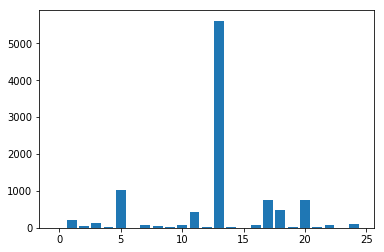

In [94]:
plt.bar(range(len(solution)),r)

In [34]:
dwave.inspector.show(sampleset)

KeyboardInterrupt: 